## Incremental Learning based Face Recognition System

### Subject: Intelligent Consumer Technology

### Name of group members:
Subhrajyoti Sen Gupta: 898072; s.sengupta1@campus.unimib.it

Shivani Bayas: 903430 ; s.bayas@campus.unimib.it

### Course professors:
Paolo Napoletano: paolo.napoletano@unimib.it

Luigi Celona: luigi.celona@unimib.it

###INSTALLING AND IMPORTING

In the first part we are going to consider some of the essential consideration like installing packages and importing libraries that are required before starting with the algorithms.

**1.** Mounting the drive so that we can access the drive beforehand and data can be fetched.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.** Here we are installing the packages that are required to be used used to install Python packages from the Python Package Index (PyPI)

In [ ]:
!pip install mtcnn
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=40b7ca91a424b733e8f874f62be7aa69610be74ad1df5a967382431c70b9f58c
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


**3.** Importing libraries required

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random
from PIL import Image
import seaborn as sns
from torchvision import transforms
import dlib
import cv2
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN
from deepface import DeepFace
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'mtcnn'

### IMPORTING THE DATA

In the upcoming phase of our project, we'll define the file paths and read the images along with their corresponding labels, which represent the characters depicted in each image.

This process will culminate in the creation of a structured dataframe. Let's ensure smooth execution as we progress towards handling the data with precision and professionalism.

**1.** Defining the path for the image.

In [ ]:
#path_zip = '/content/drive/MyDrive/selected_ids_facial' #when shivani is running the code
path_zip = '/content/drive/MyDrive/Colab Notebooks/ICT project/selected_ids' #when subhra is running the code

**2.** In the subsequent step, we'll embark on opening the images by reading their file paths from the designated directory. We'll meticulously organize this data into a tabular format, structured as a dataframe. This dataframe will boast columns representing the file paths for each image, meticulously paired with their corresponding labels. This meticulous organization ensures clarity and ease of further analysis, facilitating our journey towards comprehensive data understanding.

In [ ]:
filepath=[]
label=[]

for person in [path_zip]:
  ids=os.listdir(person)

  #26 components
  for inperson in ids:

    human=os.path.join(person,inperson)
    img_list=os.listdir(human)
    for i, img in enumerate(img_list):
      img_path=os.path.join(human, img)
      filepath.append(img_path)
      label.append(inperson)

img_df=pd.Series(filepath,name='filepaths')
label_df=pd.Series(label, name='labels')

data_df=pd.concat([img_df, label_df], axis=1)
data_df


filepaths   labels
0      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004936
1      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004936
2      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004936
3      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004936
4      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004936
...                                                  ...      ...
12845  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004576
12846  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004576
12847  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004576
12848  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004576
12849  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n004576

[12850 rows x 2 columns]

### DATA INSIGHTS AND VISUALISATION:

In this section, we're delving deep into our data, examining it closely to identify any discernible patterns and insights.

Through visualization techniques, we'll create clear representations of our data, making it easier to extract valuable information from our dataset, guiding our decision-making process moving forward.

**1.** Counting the number of images each character have by means of sorting them as label based on descending order.

In [ ]:
count=data_df['labels'].value_counts()
print(count.shape[0])
print(count)

26
labels
n004936    680
n008388    661
n000956    590
n001006    590
n003995    572
n002447    551
n006683    537
n007630    524
n007999    505
n008476    503
n002438    496
n002178    493
n004485    483
n002779    481
n008936    474
n004576    469
n005745    467
n002316    447
n001461    436
n006322    420
n003623    419
n007530    416
n006118    412
n002336    411
n005983    411
n007604    402
Name: count, dtype: int64


**2.** For creating visualisation as a plot we are creating bar plot to analyse them

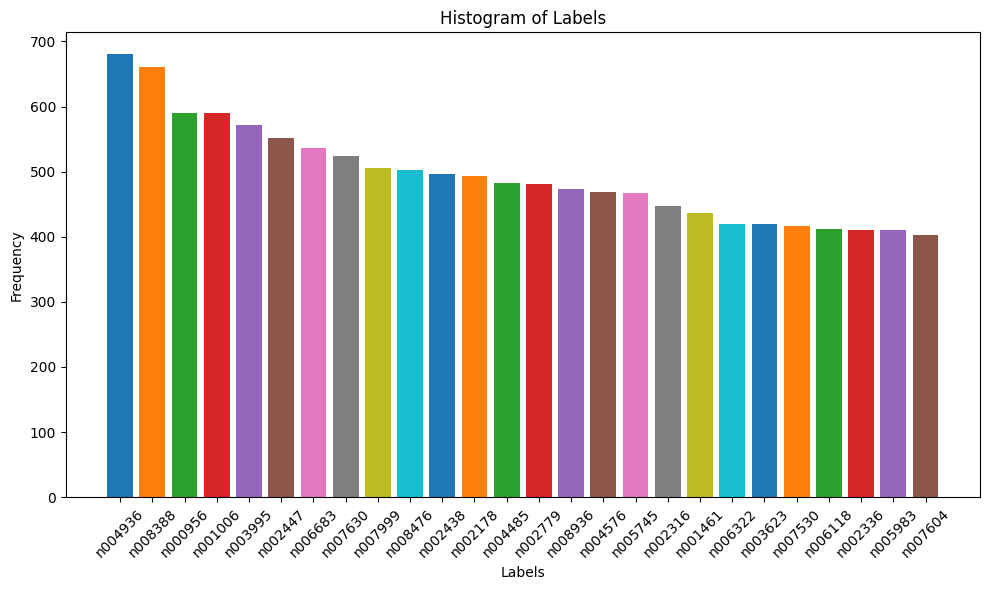

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(count.shape[0]):
  #we are plotting a histogram
  plt.bar(i, count[i])
  plt.xlabel('Labels')
  plt.ylabel('Frequency')
  plt.title('Histogram of Labels')
plt.xticks(range(len(count.index)), count.index, rotation=45)
plt.tight_layout()
plt.show()


**3.** Now as we can visualise that the data is having imbalance we can trim the data to make it equalise over the whole dataset thus making it more helpful to process.

Here we are cutting the number of images to 400 images per character and there are 26 characters, as this can help us to extract features more easily and it will take less time.

In [ ]:
def trim(max_size):
  print("number of labels=", len(data_df['labels'].unique()))
  groupping=data_df.groupby('labels').apply(lambda x:x.sample(max_size,replace=True)) #checking for those categories where the count>400
  trimmed_df=groupping.reset_index(drop=True)
  print(list(trimmed_df['labels'].value_counts()))
  return trimmed_df

trimmed_data_df=trim(400)
trimmed_data_df

number of labels= 26
[400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]


filepaths   labels
0      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n000956
1      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n000956
2      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n000956
3      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n000956
4      /content/drive/MyDrive/Colab Notebooks/ICT pro...  n000956
...                                                  ...      ...
10395  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n008936
10396  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n008936
10397  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n008936
10398  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n008936
10399  /content/drive/MyDrive/Colab Notebooks/ICT pro...  n008936

[10400 rows x 2 columns]

**4.** Counting the number of images in each categories and as we can see all of the characters are having 400 images.

In [ ]:
count=trimmed_data_df['labels'].value_counts()
print(count.shape[0])
print(count)

26
labels
n000956    400
n001006    400
n008476    400
n008388    400
n007999    400
n007630    400
n007604    400
n007530    400
n006683    400
n006322    400
n006118    400
n005983    400
n005745    400
n004936    400
n004576    400
n004485    400
n003995    400
n003623    400
n002779    400
n002447    400
n002438    400
n002336    400
n002316    400
n002178    400
n001461    400
n008936    400
Name: count, dtype: int64


**5.** Visualising the distribution after the balancing process

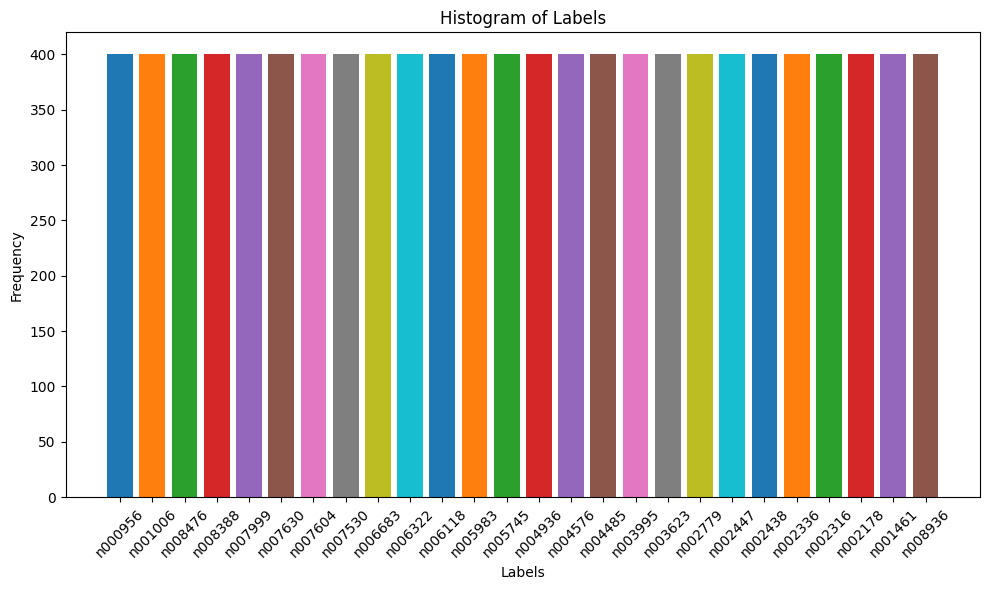

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(count.shape[0]):
  #we are plotting a histogram
  plt.bar(i, count[i])
  plt.xlabel('Labels')
  plt.ylabel('Frequency')
  plt.title('Histogram of Labels')
plt.xticks(range(len(count.index)), count.index, rotation=45)
plt.tight_layout()
plt.show()


**6.** After visualising the balanced data now it is time to check the image and the content it holds.

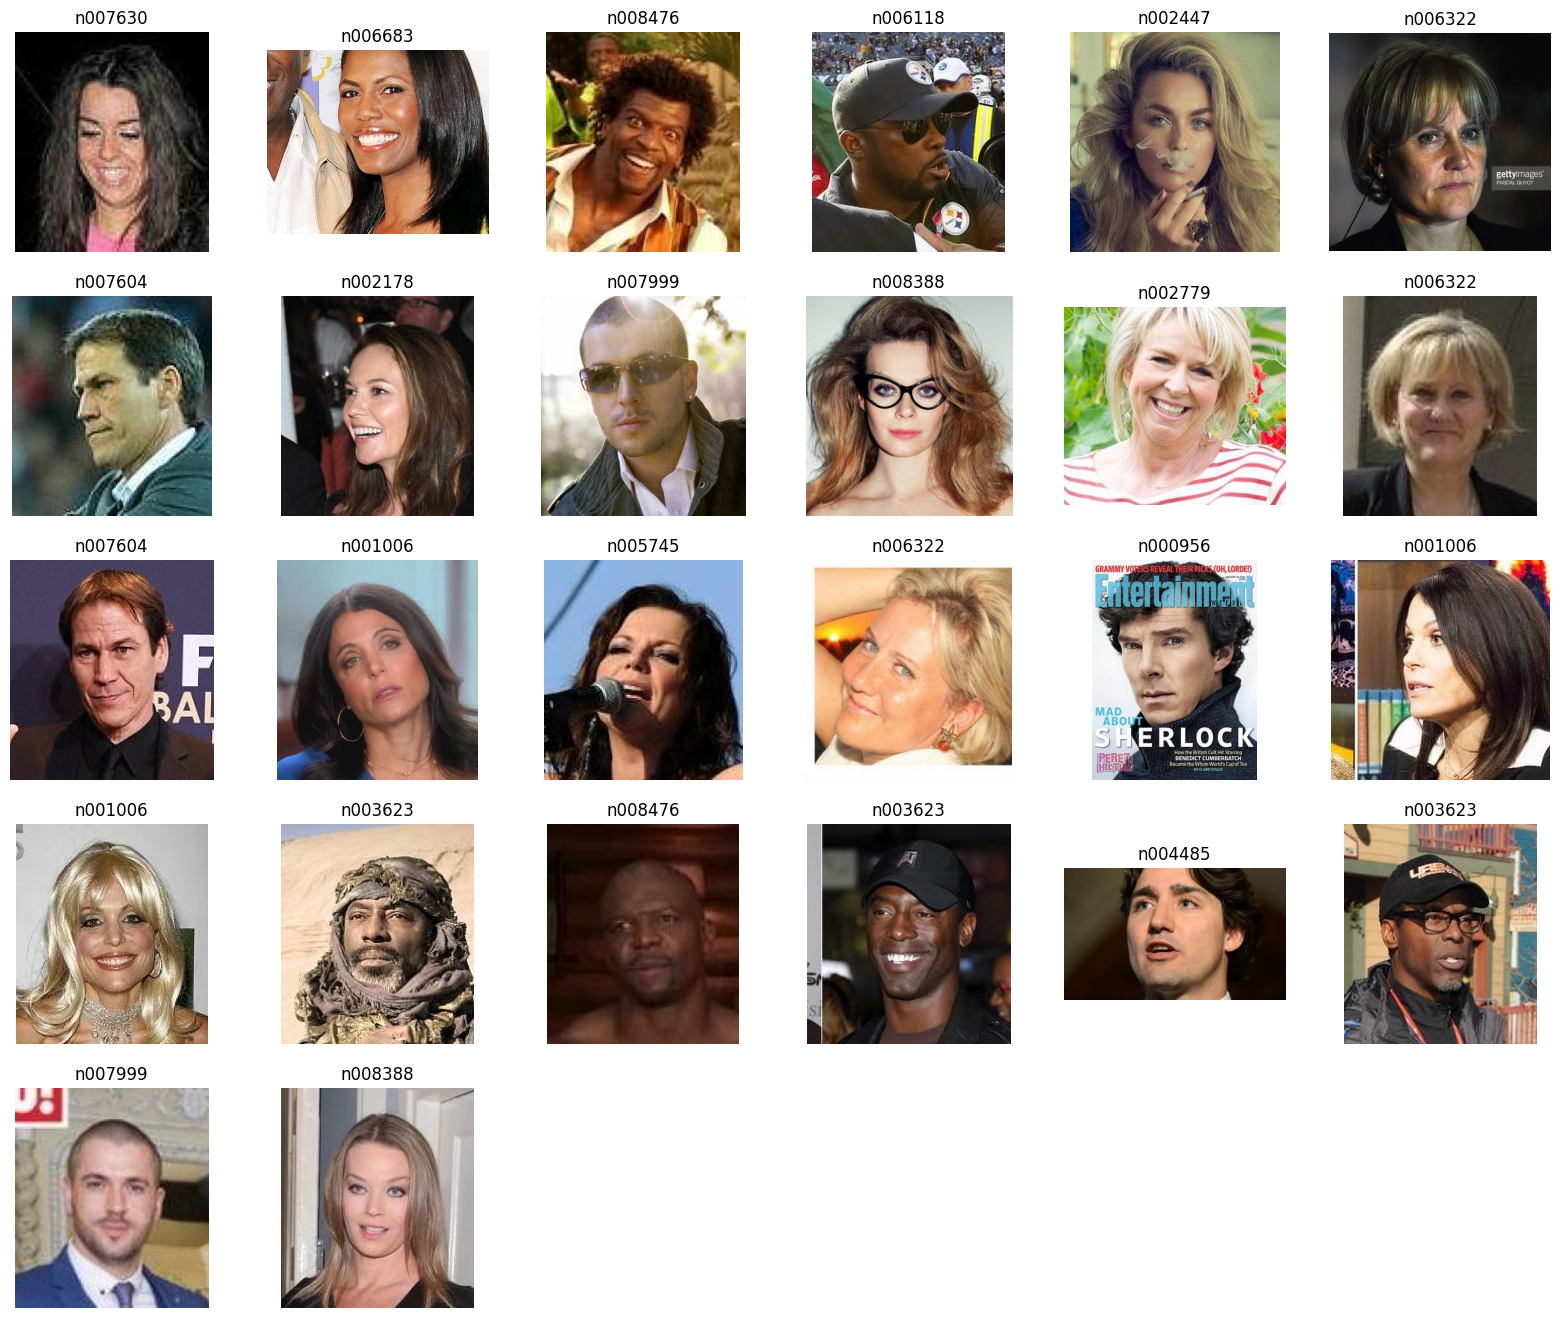

In [ ]:
def image_show(gen):
    plt.figure(figsize=(20, 20))
    if len(gen) > 26:
        r = 26
    else:
        r = len(gen)
    random_sample = random.sample(range(len(gen)), r)
    for i, idx in enumerate(random_sample):
        image_path = gen.iloc[idx, 0]
        label = gen.iloc[idx, 1]
        image = Image.open(image_path)
        plt.subplot(6, 6, i + 1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')  # Turn off axis for cleaner visualization

    plt.show()

image_show(trimmed_data_df)

### FOR FEATURE EXTRACTION, WE'LL BE CONDUCTING LANDMARK AND FACE DETECTION:

In image recognition/ face recognition system the most important aspect to consider is the detection of the face for which we are going to use `MTCNN()` which is acting as a face detector and the purspose is to use this to detect the faces in the image.

Once the face is detected we can draw bounding box and using `dlib.shape_predictor` we can infuse the 68 landmark points over the face that is being detected.

Now to form the feature vector we are going to loop over every single images and using the `Mobilenet_v2` pretrained model we are going to extract features in form of vector for each image.


**1.** First of all we are defining a function called "landmark" that is going to detect the 68 points of landmark over the face.

In [ ]:
def landmark(landmarks, image_rgb):
  # Draw landmark points on the face
  for i in range(68):
    x_landmark = landmarks.part(i).x
    y_landmark = landmarks.part(i).y
    marks=cv2.circle(image_rgb, (x_landmark, y_landmark), 1, (0, 0, 255), -1)
  return marks


**2.** We define a function called "extract_features" which works as a feature vector creator of each image that means it is going to extract features from each image and then store it as a CSV file. For each image we have feature vector CSV files along with labels.

In [ ]:
'''
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
from tqdm import tqdm  # For progress bar
from torch.utils.data import Dataset, DataLoader
import os

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)
model.classifier = torch.nn.Identity()  # Remove the classification head

# Move the model to the GPU
model = model.to(device)

# Set the model to evaluation mode
model.eval()

# Define the image preprocessing function
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class ImageDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['filepaths']
        label = self.dataframe.iloc[idx]['labels']
        img = Image.open(img_path).convert('RGB')
        img_tensor = preprocess(img)
        return img_tensor, label, idx

def extract_features(data_loader, model, device):
    model.eval()  # Ensure model is in evaluation mode
    for img_tensor, labels, indices in tqdm(data_loader):
        img_tensor = img_tensor.to(device)
        with torch.no_grad():
            features = model(img_tensor)
        features_np = features.cpu().numpy()  # Move to CPU and convert to numpy array

        for i in range(features_np.shape[0]):
            features_df = pd.DataFrame([features_np[i].flatten()])
            label_str = labels[i] if isinstance(labels[i], str) else str(labels[i])
            path_save = f'/content/drive/MyDrive/ict_project/{label_str}_{indices[i]+1}.csv'
            features_df.to_csv(path_save, index=False)

# Assuming trimmed_data_df is your DataFrame with columns 'filepaths' and 'labels'
# trimmed_data_df = pd.read_csv('path_to_your_dataframe.csv')

dataset = ImageDataset(trimmed_data_df)
batch_size = 32  # Adjust as needed
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Extract features using the DataLoader
extract_features(data_loader, model, device)

'''

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 99.7MB/s]
100%|██████████| 325/325 [21:33<00:00,  3.98s/it]


**3.** For visualising how the prcoess is working

1/1 [==============================] - 0s 198ms/step


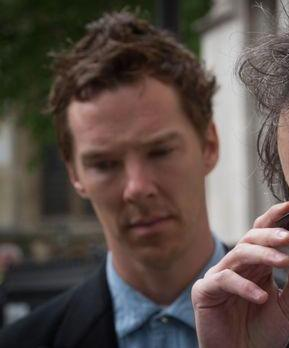

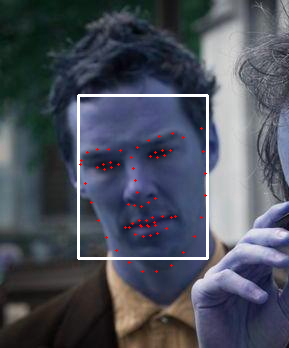

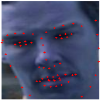

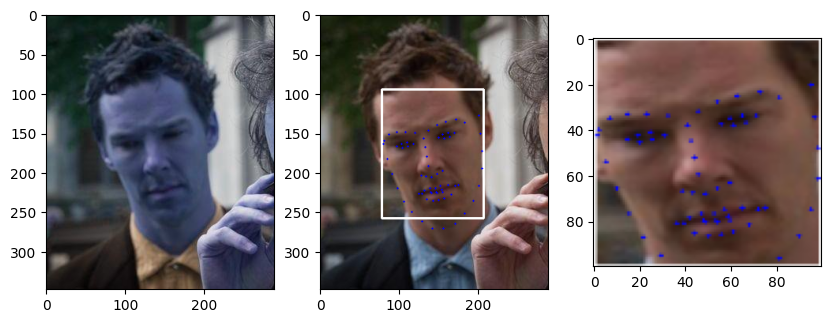

1/1 [==============================] - 0s 47ms/step


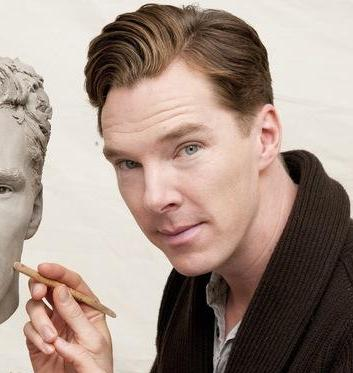

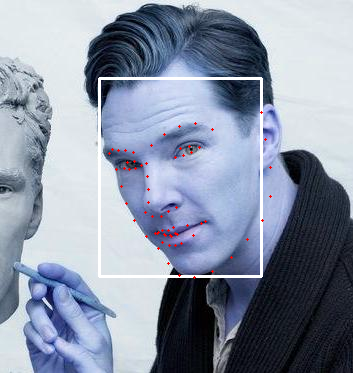

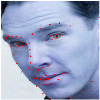

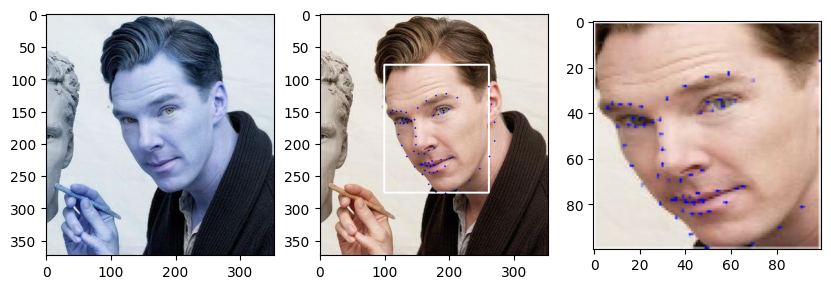

1/1 [==============================] - 0s 27ms/step


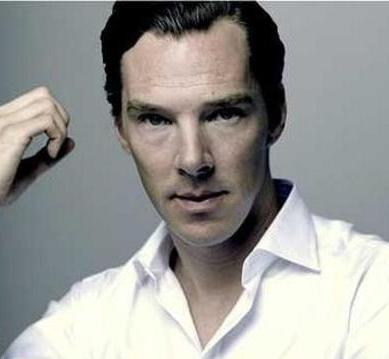

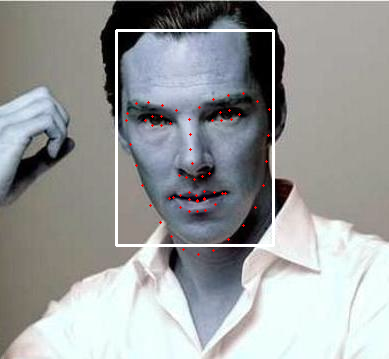

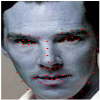

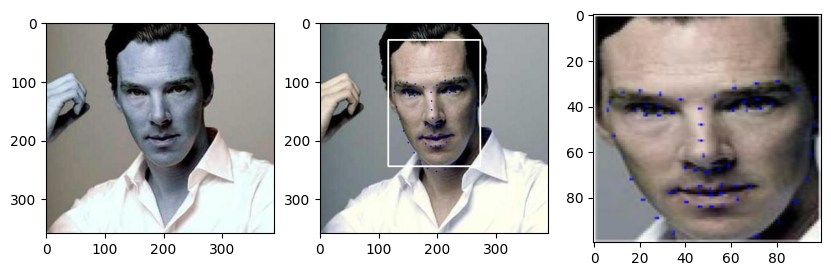

1/1 [==============================] - 0s 47ms/step


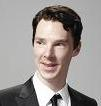

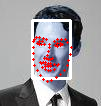

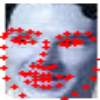

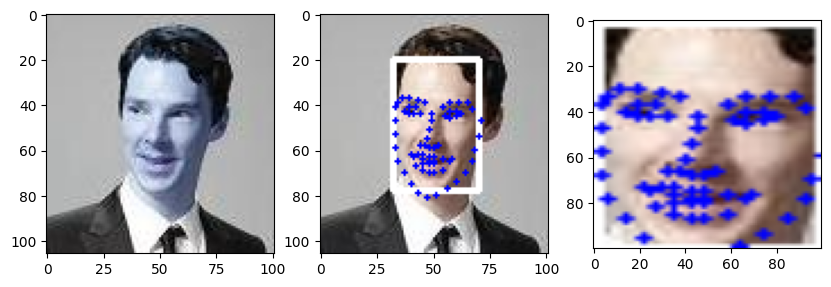

1/1 [==============================] - 0s 63ms/step


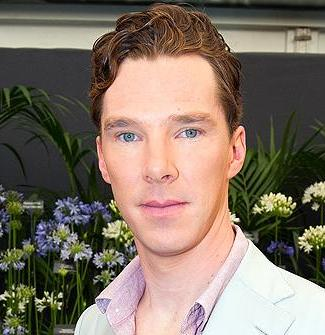

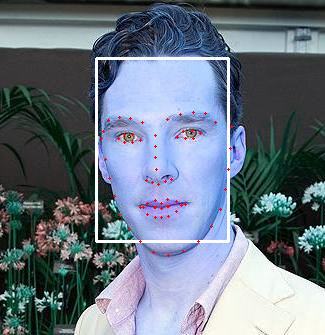

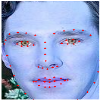

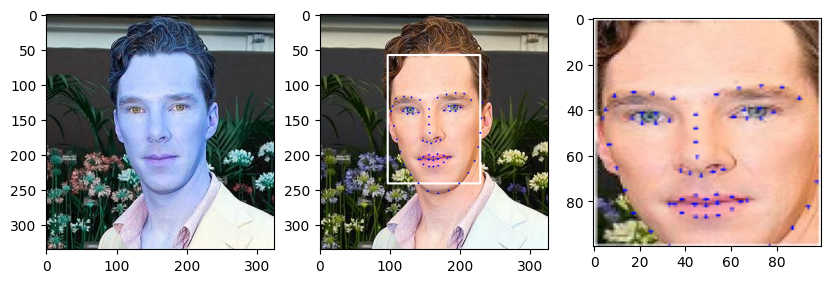

1/1 [==============================] - 0s 28ms/step


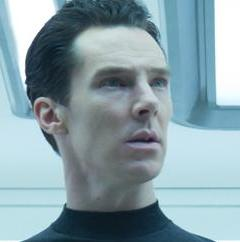

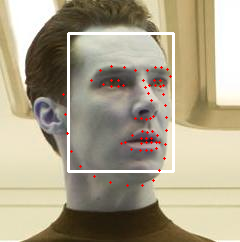

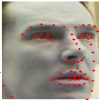

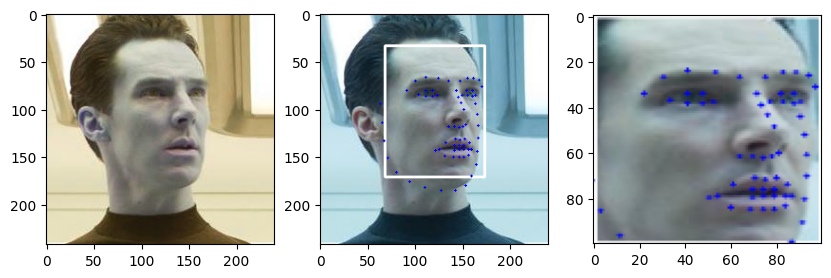

1/1 [==============================] - 0s 33ms/step


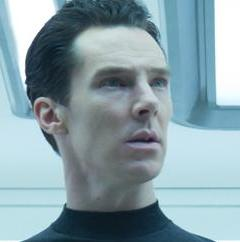

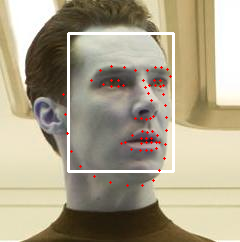

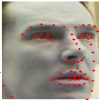

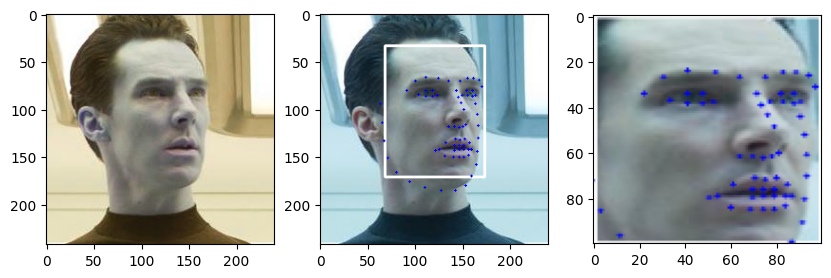

1/1 [==============================] - 0s 32ms/step


In [ ]:

detector = MTCNN()  # Path to face detector
#predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")  #when shivani is running the code
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/ICT project/shape_predictor_68_face_landmarks.dat")  #when subhra is running the code

# Define target size for resized images
target_size = (100,100)

##################Iterate through each image in the dataframe###################
for index, row in trimmed_data_df.iterrows():
    # Read image
    image = cv2.imread(row['filepaths'])
    name= row['labels']

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces in the RGB image
    faces = detector.detect_faces(image_rgb)

    # Initialize variables to store information about the largest face
    largest_face_size = 0
    largest_face_bbox = None
    largest_face_landmarks = None

    # Process each detected face
    for face in faces:
        x, y, w, h = face['box']

        # Calculate face size
        face_size = w * h

        # Check if the current face is the largest so far
        if (face_size > largest_face_size) or len(face)<=1:
            largest_face_size = face_size
            largest_face_bbox = (x, y, w, h)

    # Check if a face is detected
    if largest_face_bbox is not None:
        x, y, w, h = largest_face_bbox

        # Create a dlib rectangle object from the detected face bounding box
        dlib_rect = dlib.rectangle(x, y, x + w, y + h)

        # Predict facial landmarks using dlib shape predictor
        landmarks = predictor(image_rgb, dlib_rect)

        # Draw rectangle around the face
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (400, 400, 400), 2)

        # Draw landmark points on the face
        landmark(landmarks, image_rgb)

        # Crop largest face region
        cropped_face = image_rgb[y:y + h, x:x + w]

        # Resize cropped face to target size
        aligned_face = cv2.resize(cropped_face, target_size)

#########################FOR SHOWING THE PICTURE################################
        if index < 7:
            cv2_imshow(image)
            cv2_imshow(image_rgb)
            cv2_imshow(aligned_face)

            # Display aligned face
            fig, axes = plt.subplots(1, 3, figsize=(10, 5))
            axes[0].imshow(image)
            axes[1].imshow(image_rgb)
            axes[2].imshow(aligned_face)

            plt.show()

        else:
          break


cv2.waitKey(0)
cv2.destroyAllWindows()



### READING THE FEATURES AND SPLITTING THE DATA:

As of now we have read and extracted the features and stored them in CSV format. For the next part we are going to read those CSV file from the path and make a dataframe with all the features corresponding to its labels. Once done we move forward with splitting the dataset.

**1.** First we are loading the CSV file and reading them once it is done we are moving forward with creating a dataframe with extracted features for each image and corresponding labels. These are the columns within the dataframe and there are about 512 features for each image.

In [ ]:

img_features=[]
img_features_df=[]
#feature_path="/content/drive/MyDrive/ict_project/" #when shivani is running the code
feature_path='/content/drive/MyDrive/Colab Notebooks/ICT project/new_feature' #when subhra is running the code

for items in [feature_path]:
  files_path=os.listdir(items)
  for feature in files_path:
    make_labels=feature
    file_path=os.path.join(items,feature)
    feature_df=pd.read_csv(file_path, delimiter=",")
    feature_df['labels']=make_labels[:7]
    img_features.append(feature_df)

img_features_df = pd.concat(img_features, ignore_index=True)
img_features_df

0         1         2         3         4         5         6  \
0      0.007445  0.012520  0.212631  0.381830  0.045887  0.117228  0.161402   
1      0.224167  0.117345  0.026429  0.402327  0.126353  0.240969  0.207592   
2      0.000000  0.159750  0.039825  0.012519  0.150124  0.324957  0.282899   
3      0.026743  0.390354  2.346840  0.650409  0.191059  0.004721  0.169396   
4      0.002362  0.107742  0.203384  0.000000  0.409704  0.084840  0.197979   
...         ...       ...       ...       ...       ...       ...       ...   
10395  0.558294  0.613232  0.312344  0.640357  0.130303  0.703068  0.253864   
10396  0.010764  0.072037  0.000000  0.248587  0.584711  0.347731  0.083921   
10397  0.000000  0.662442  0.023131  0.631227  0.606510  0.338497  0.003926   
10398  0.032729  0.089515  0.997792  0.517794  0.216556  0.224120  0.055960   
10399  0.292174  0.489857  1.003168  0.461230  0.309916  0.033194  0.004664   

              7         8         9  ...      1271      1272      1273  \
0      0.000000  0.298546  0.361916  ...  0.034728  0.141984  1.053408   
1      0.099888  0.398904  0.625620  ...  0.387731  0.221912  0.867603   
2      0.029340  0.305781  0.224123  ...  0.013697  0.072442  1.036498   
3      0.000000  0.189958  0.064537  ...  0.140802  0.006007  0.739611   
4      0.000000  0.047832  1.273038  ...  0.053238  0.397619  0.651862   
...         ...       ...       ...  ...       ...       ...       ...   
10395  0.061888  0.173168  0.687278  ...  0.416082  0.356741  0.649720   
10396  0.402932  0.326567  0.004713  ...  0.236329  0.550690  0.358839   
10397  0.776202  0.163389  0.602818  ...  0.173356  0.459958  0.493990   
10398  0.129252  0.340633  0.030478  ...  0.256338  0.204812  0.498391   
10399  0.224230  0.332625  0.215813  ...  0.011920  0.064485  1.513653   

           1274      1275      1276      1277      1278      1279   labels  
0      0.604756  0.349356  0.005070  0.092518  0.104164  0.000000  n008388  
1      0.134104  0.043022  0.000000  0.211786  0.000939  0.000000  n008388  
2      0.842760  0.799762  0.002424  0.206404  0.114897  0.000000  n008388  
3      0.317443  0.057025  0.000000  0.000000  0.010564  0.165693  n008388  
4      0.052750  0.562958  0.069761  0.275006  0.249601  0.074917  n008388  
...         ...       ...       ...       ...       ...       ...      ...  
10395  0.035728  0.102021  0.163550  1.035066  0.199932  0.000000  n000956  
10396  0.494026  0.124479  0.000000  0.081964  0.004893  0.253931  n000956  
10397  0.561084  0.449485  0.144626  0.485935  0.000000  0.000000  n000956  
10398  0.790436  0.239132  0.023001  0.105240  0.037405  0.000000  n000956  
10399  0.961284  0.590918  0.227434  0.047810  0.211250  0.553388  n000956  

[10400 rows x 1281 columns]

**2.** Once the data is stored as dataframe now we can use it for our ML application. Initially we are splitting the data into training, validating and testing using `train_test_split`.



In [ ]:
X=img_features_df.drop(['labels'],axis=1)
Y=img_features_df['labels']

X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.20,stratify=Y, random_state=42)
X_train, X_val, Y_train, Y_val= train_test_split(X_train,Y_train, test_size=0.20, stratify=Y_train, random_state=42 )
print(X_train.shape, '\n' , Y_train.shape, '\n' ,Y_train.unique(), '\n' ,Y_val.unique())
print(X_val.shape, '\n' , Y_val.shape, '\n' ,Y_train.unique(), '\n' ,Y_val.unique())


(6656, 1280) 
 (6656,) 
 ['n004576' 'n002336' 'n000956' 'n001461' 'n008936' 'n007630' 'n002779'
 'n002316' 'n007604' 'n005745' 'n002178' 'n007530' 'n001006' 'n004936'
 'n004485' 'n003623' 'n003995' 'n006118' 'n008388' 'n006322' 'n008476'
 'n006683' 'n007999' 'n002438' 'n002447' 'n005983'] 
 ['n000956' 'n002438' 'n006118' 'n004485' 'n003623' 'n005983' 'n007999'
 'n002336' 'n001461' 'n002447' 'n008388' 'n006683' 'n007630' 'n004936'
 'n004576' 'n007530' 'n005745' 'n008936' 'n007604' 'n001006' 'n003995'
 'n008476' 'n002779' 'n002316' 'n002178' 'n006322']
(1664, 1280) 
 (1664,) 
 ['n004576' 'n002336' 'n000956' 'n001461' 'n008936' 'n007630' 'n002779'
 'n002316' 'n007604' 'n005745' 'n002178' 'n007530' 'n001006' 'n004936'
 'n004485' 'n003623' 'n003995' 'n006118' 'n008388' 'n006322' 'n008476'
 'n006683' 'n007999' 'n002438' 'n002447' 'n005983'] 
 ['n000956' 'n002438' 'n006118' 'n004485' 'n003623' 'n005983' 'n007999'
 'n002336' 'n001461' 'n002447' 'n008388' 'n006683' 'n007630' 'n004936'
 'n004576

### MODELS AND THERE PERFORMANCE:

Here we start of with `MLPClassifier` which is a classication machine learning model. In first case we are going to directly put all the training data at once here we are not going to use incremental learning. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

In [ ]:
for_plot=[]
for_plot

[]

Validation Accuracy: 0.8287
Test Accuracy: 0.8269
Test F1-Score: 0.8268


<Figure size 1000x1000 with 0 Axes>

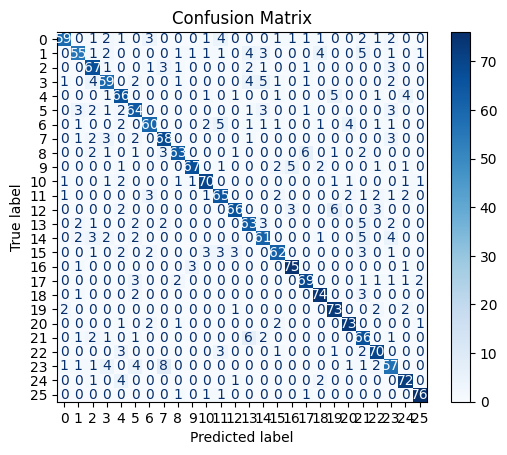

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assuming X_train, X_val, X_test, Y_train, Y_val, Y_test are defined earlier

# Initialize the model
model = MLPClassifier()

# Fit the model on the entire training set
model.fit(X_train, Y_train)

# Predict on the validation set
val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(Y_val, val_prediction)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict on the test set
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_prediction)
print(f"Test Accuracy: {test_accuracy:.4f}")
for_plot.append(test_accuracy)
# Calculate F1 score for test set
test_f1_score = f1_score(Y_test, test_prediction, average='weighted')
print(f"Test F1-Score: {test_f1_score:.4f}")

# Plot the confusion matrix for test set
cm = confusion_matrix(Y_test, test_prediction)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
for_plot

[0.8269230769230769]

Here we start of with `SGDClassifier` which is a classication machine learning model. We are not going to directly put all the training data at once here we are going to use incremental learning which helps us to learn and update the knowledge of the model by individual instance or by batch. For this case we use batch of 60 once the training is done the model is updated with the new batch of data along with the previously learned patterns thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

Accuracy in batch 0: 0.04326923076923077
Accuracy in batch 1: 0.17728365384615385
Accuracy in batch 2: 0.1466346153846154
Accuracy in batch 3: 0.20973557692307693
Accuracy in batch 4: 0.28665865384615385
Accuracy in batch 5: 0.18810096153846154
Accuracy in batch 6: 0.3082932692307692
Accuracy in batch 7: 0.3659855769230769
Accuracy in batch 8: 0.40564903846153844
Accuracy in batch 9: 0.3173076923076923
Accuracy in batch 10: 0.3389423076923077
Accuracy in batch 11: 0.47115384615384615
Accuracy in batch 12: 0.40625
Accuracy in batch 13: 0.34915865384615385
Accuracy in batch 14: 0.4573317307692308
Accuracy in batch 15: 0.4801682692307692
Accuracy in batch 16: 0.5096153846153846
Accuracy in batch 17: 0.46153846153846156
Accuracy in batch 18: 0.46634615384615385
Accuracy in batch 19: 0.5390625
Accuracy in batch 20: 0.5390625
Accuracy in batch 21: 0.5444711538461539
Accuracy in batch 22: 0.5685096153846154
Accuracy in batch 23: 0.5612980769230769
Accuracy in batch 24: 0.5787259615384616
Accu

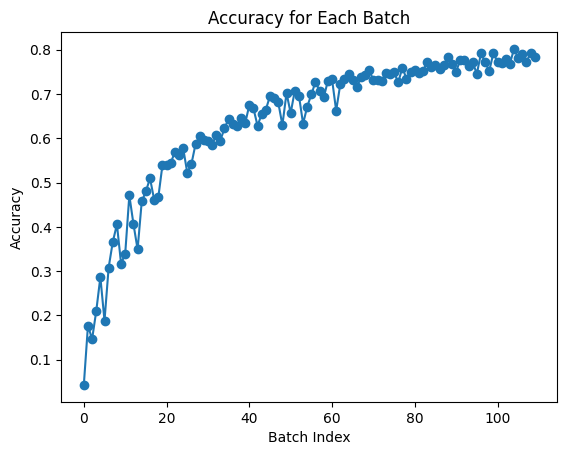

Test Accuracy: 0.7875
Test F1-Score: 0.7908401058751393


<Figure size 1000x1000 with 0 Axes>

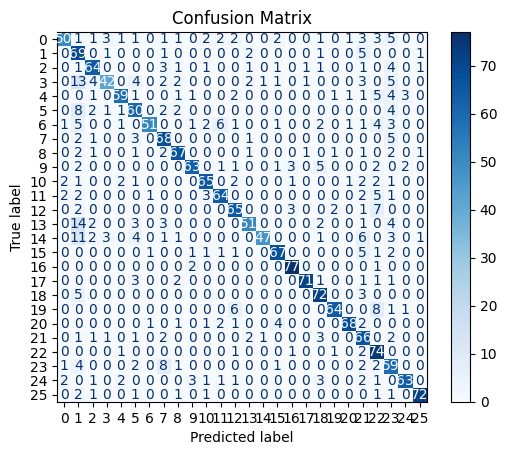

In [ ]:
# Initialize the model
model = SGDClassifier()
# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []
for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for_plot

[0.8269230769230769, 0.7875]

Moving further, we consider `MLPClassifier`, a classification machine learning model. Instead of feeding all the training data at once, we utilize incremental learning, which allows the model to learn and update its knowledge instance-by-instance or batch-by-batch. For this scenario, we use batches of 60. After each batch is processed, the model updates its knowledge with the new data while retaining the patterns learned from previous batches, thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

Accuracy in batch 0: 0.051682692307692304
Accuracy in batch 1: 0.06850961538461539
Accuracy in batch 2: 0.0733173076923077
Accuracy in batch 3: 0.08353365384615384
Accuracy in batch 4: 0.1171875
Accuracy in batch 5: 0.15745192307692307
Accuracy in batch 6: 0.1893028846153846
Accuracy in batch 7: 0.2205528846153846
Accuracy in batch 8: 0.2626201923076923
Accuracy in batch 9: 0.2848557692307692
Accuracy in batch 10: 0.32091346153846156
Accuracy in batch 11: 0.35997596153846156
Accuracy in batch 12: 0.3792067307692308
Accuracy in batch 13: 0.4230769230769231
Accuracy in batch 14: 0.42247596153846156
Accuracy in batch 15: 0.4645432692307692
Accuracy in batch 16: 0.4735576923076923
Accuracy in batch 17: 0.4831730769230769
Accuracy in batch 18: 0.5072115384615384
Accuracy in batch 19: 0.5240384615384616
Accuracy in batch 20: 0.5354567307692307
Accuracy in batch 21: 0.5432692307692307
Accuracy in batch 22: 0.5522836538461539
Accuracy in batch 23: 0.5703125
Accuracy in batch 24: 0.557091346153

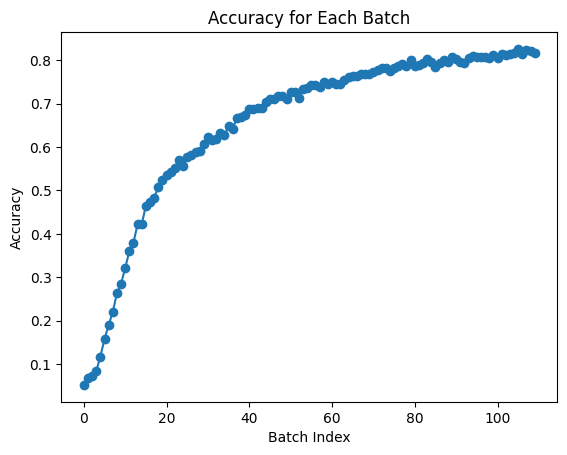

Test Accuracy: 0.8298076923076924
Test F1-Score: 0.8295217585906994


<Figure size 1000x1000 with 0 Axes>

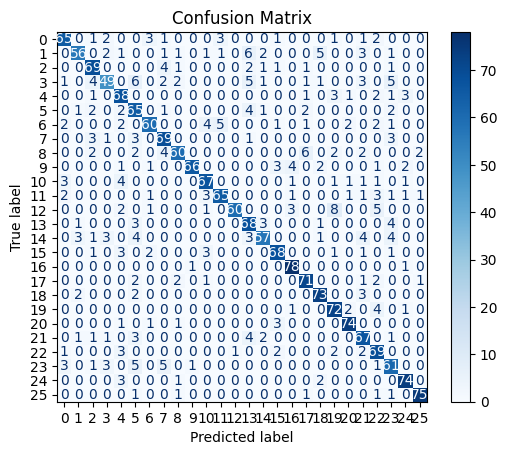

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the model
model = MLPClassifier()

# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []

for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for_plot

[0.8269230769230769, 0.7875, 0.8298076923076924]

Moving further, we consider `PassiveAggressiveClassifier`, a classification machine learning model. Instead of feeding all the training data at once, we utilize incremental learning, which allows the model to learn and update its knowledge instance-by-instance or batch-by-batch. For this scenario, we use batches of 60. After each batch is processed, the model updates its knowledge with the new data while retaining the patterns learned from previous batches, thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

Accuracy in batch 0: 0.09975961538461539
Accuracy in batch 1: 0.1171875
Accuracy in batch 2: 0.24278846153846154
Accuracy in batch 3: 0.24338942307692307
Accuracy in batch 4: 0.2692307692307692
Accuracy in batch 5: 0.2980769230769231
Accuracy in batch 6: 0.28185096153846156
Accuracy in batch 7: 0.4254807692307692
Accuracy in batch 8: 0.3918269230769231
Accuracy in batch 9: 0.4441105769230769
Accuracy in batch 10: 0.46694711538461536
Accuracy in batch 11: 0.5186298076923077
Accuracy in batch 12: 0.48497596153846156
Accuracy in batch 13: 0.5186298076923077
Accuracy in batch 14: 0.53125
Accuracy in batch 15: 0.5582932692307693
Accuracy in batch 16: 0.5600961538461539
Accuracy in batch 17: 0.5811298076923077
Accuracy in batch 18: 0.5234375
Accuracy in batch 19: 0.5745192307692307
Accuracy in batch 20: 0.5540865384615384
Accuracy in batch 21: 0.5979567307692307
Accuracy in batch 22: 0.5721153846153846
Accuracy in batch 23: 0.6123798076923077
Accuracy in batch 24: 0.6268028846153846
Accuracy

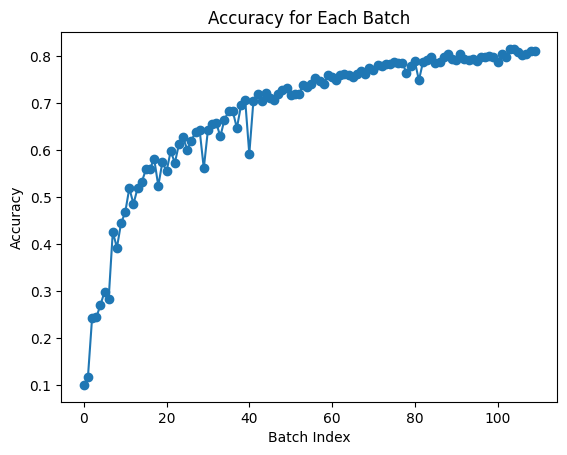

Test Accuracy: 0.8110576923076923
Test F1-Score: 0.8116705087377467


<Figure size 1000x1000 with 0 Axes>

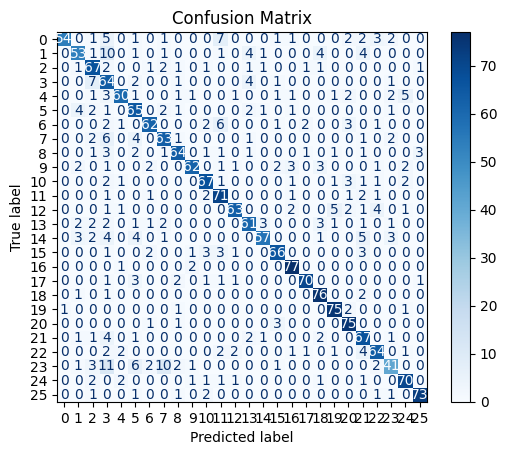

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the model
model = PassiveAggressiveClassifier()

# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []

for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
for_plot

[0.8269230769230769, 0.7875, 0.8298076923076924, 0.8110576923076923]

In [ ]:
perform=[0.8269230769230769, 0.7875, 0.8298076923076924, 0.8110576923076923]

###FINAL ACCURACY VISUALISATION:

Finally we are going to visualise the plot of accuracy on the test set based on `f1_score`

In [ ]:
print(perform)

[0.8269230769230769, 0.7875, 0.8298076923076924, 0.8110576923076923]


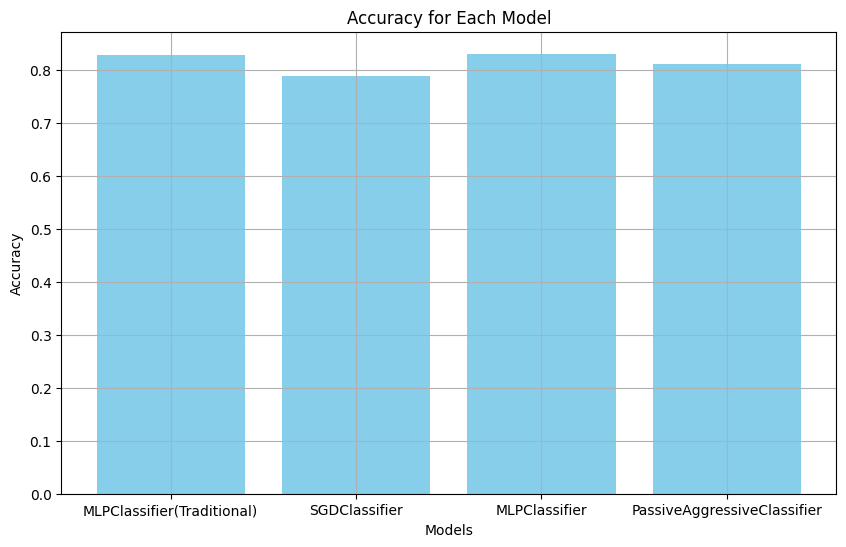

In [ ]:
names=['MLPClassifier(Traditional)', 'SGDClassifier', 'MLPClassifier', 'PassiveAggressiveClassifier']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(names, perform, color='skyblue')

# Label the axes
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Model')

# Show the plot
plt.grid(True)
plt.show()